<a href="https://colab.research.google.com/github/1991Ab/Capstone-Project-3-Credit-Card-Default-Prediction/blob/main/DefaultCreditCcard_Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Credit Card Default Prediction**







##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


This project is aimed at predicting the case of customers default payments in Taiwan.

From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.

We can use the K-S chart to evaluate which customers will default on their credit card payments

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import numpy as np
import seaborn as sns
from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 2.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.6/567.6 KB 7.3 MB/s eta 0:00:00


### Dataset Loading

In [2]:
# Load Dataset
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Importing the dataset
file_path = "/content/drive/MyDrive/Capstone project 3/default of credit card clients.xls"
df = pd.read_excel(file_path)


### Dataset First View

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns 
df.shape

(30001, 25)

The given dataset of Default Credit Card Payment has 30001 rows and 25 columns.

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

We find that there are  no duplicate values in the dataset.

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64


<Axes: >

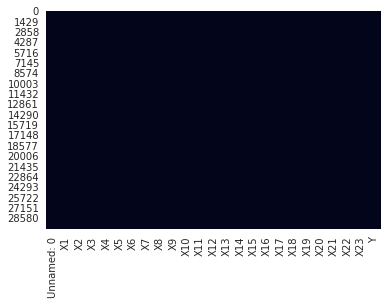

In [8]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

From the above code it is seen that there are no null values in the dataset.

### What did you know about your dataset?

The  dataset given is details of customers and their credit card payment details.The objective of our project is to predict which customer might default in crdit card payments in upcoming months.This dataset has 30001 rows and 25 columns.It has no duplicate and no null values.

In [9]:
# Dataset Columns
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe(include='all')

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


The above code shows the description of each variables in the dataset.

### Variables Description 

* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* X2: Gender (1 = male; 2 = female).
*X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
*X4: Marital status (1 = married; 2 = single; 3 = others).
*X5: Age (year).
*X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)
*X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
*X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
*Default.payment.next.month: Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [16]:
df.columns = df.iloc[0]
print(df.columns)
df.drop(labels= 0, axis = 0, inplace = True)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)


In [17]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

No. of unique values in  ID is 30000
No. of unique values in  LIMIT_BAL is 81
No. of unique values in  SEX is 2
No. of unique values in  EDUCATION is 7
No. of unique values in  MARRIAGE is 4
No. of unique values in  AGE is 56
No. of unique values in  PAY_0 is 11
No. of unique values in  PAY_2 is 11
No. of unique values in  PAY_3 is 11
No. of unique values in  PAY_4 is 11
No. of unique values in  PAY_5 is 10
No. of unique values in  PAY_6 is 10
No. of unique values in  BILL_AMT1 is 22723
No. of unique values in  BILL_AMT2 is 22346
No. of unique values in  BILL_AMT3 is 22026
No. of unique values in  BILL_AMT4 is 21548
No. of unique values in  BILL_AMT5 is 21010
No. of unique values in  BILL_AMT6 is 20604
No. of unique values in  PAY_AMT1 is 7943
No. of unique values in  PAY_AMT2 is 7899
No. of unique values in  PAY_AMT3 is 7518
No. of unique values in  PAY_AMT4 is 6937
No. of unique values in  PAY_AMT5 is 6897
No. of unique values in  PAY_AMT6 is 6939
No. of unique values in  default pay

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df_new
df_new=df.copy()
df_new.shape

(30000, 25)

In [19]:
df_new.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [20]:
#Renaming the target variable for the ease of use
df.rename(columns = {'default payment next month': 'Is_defaulters'}, inplace = True)

**Analysing the education of the customers**

In [21]:
df.groupby("EDUCATION")["ID"].count().reset_index().rename(columns={"ID" : "Number of customers"})

,EDUCATION,Number of customers
0,0,14
1,1,10585
2,2,14030
3,3,4917
4,4,123
5,5,280
6,6,51


From the above data we can infer that Highest number of customers are getting educted in universites that is around 14030.Also, the second highest number of customers are graduated in school i.e 10585.The third highest number of customers have just finished high school i.e 4917.Where as very few of them are educated in other ways.

**Analysing the count of customers who have more than three months of due repayment in the recent month occured that is September.**

In [22]:
len(df[df["PAY_0"] >=3])

463

From the above analysis we can see that there are 463 cutomers who have more than 3 months due of repayment in the month of september.

**Now, I shall analyse the number of males and females who have more than three months due of repayment in the month of September.**

In [23]:
due_september=df[df["PAY_0"]>=3]
due_september.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is_defaulters
130,130,60000,1,3,1,55,3,2,2,0,...,28853,29510,26547,2504,7,1200,1200,1100,1500,0
160,160,50000,1,3,1,57,3,2,0,0,...,13427,13711,14083,0,1600,500,500,600,600,0


In [24]:
due_september.groupby("SEX")["ID"].count().reset_index().rename(columns={"ID" : "Number of customers"})

,SEX,Number of customers
0,1,242
1,2,221


From the above analysis it is clear  that the male customers are more in number than females in the due payment list (of more than three months)in the recent month that is September.The number of male defaulters is 242 and female defaulters is 221.

**Now,I shall analyse the average age of custmers who are using Credit card**

In [25]:
defaulter_age=df.groupby("Is_defaulters")["AGE"].mean().round()
defaulter_age.reset_index()

,Is_defaulters,AGE
0,0,35.0
1,1,36.0


From the above code we can see that the average age of customers who are not defaulters of payment is 35.The average age of cutomer who are  defaulters of paynent is 36

**Analysing the count of customers who have duly payed the credit bills of all the months.**

In [26]:
duly_paid=df[(df["PAY_0"] == 1) | (df["PAY_2"] == 1) | (df["PAY_3"] == 1) | (df["PAY_4"] == 1) | (df["PAY_5"] == 1 ) | (df["PAY_6"] == 1)]
duly_paid.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is_defaulters
14,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,16,50000,2,3,3,23,1,2,0,0,...,28771,29531,30211,0,1500,1100,1200,1300,1100,0


In [27]:
len(duly_paid)

3688

From the above code we see that there are 3688 customers who have duly paid all the bills of all the months.

**Now , I shall analyse the education of customers who have duly paid all their bills.**



In [28]:
duly_paid.groupby("EDUCATION")["ID"].count().reset_index().rename(columns={"ID" : "Number of customers"})

,EDUCATION,Number of customers
0,0,3
1,1,1366
2,2,1676
3,3,614
4,4,13
5,5,16


The above code shows the education details of customers of have duly paid all the bills of all the months.The highest number of customers are graduated in universites i.e 1676.  Around 1366 of customers have finished education in graduation school.Around 614 of them have completed high school.Very few of them are educated in other ways.

**Now, I shall analyse the martial status of customers who have duly paid bills of all the months.**

In [ ]:
duly_paid.groupby("MARRIAGE")["ID"].count().reset_index().rename(columns={"ID" : "Number of customers"})

,MARRIAGE,Number of customers
0,0,7
1,1,1719
2,2,1916
3,3,46


The above code shows the marriage details of cutomers who have duly paid all the bills of all the months.It is seen that number of unmarried customers are more i.e 1916 who could pay all the bills.The number of married customers is comparetively less i.e 1719 who could pay all the bills.The oher's count is neglible which sums up to 53.

### What all manipulations have you done and insights you found?

According to a perception we will get a clear view of customers and their credit history by graphical representaions.However for analysing the customer's information and their credit history details,  it is necessary to deep dive into the data set to unearth many insights.Is have renamed the dependent variable from "default payment next month"  "Is_defaulters"
Following are the insights that were analysed:

*   Fisrt , I analysed the education of customers using credit card and found
    out that : Highest number of customers are getting educted in universites 
    that is around 14030.Also, the second highest number of customers are 
    graduated in school i.e 10585.The third highest number of customers have 
    just finished high school i.e 4917.Where as very few of them are educated 
    in other ways. 
    


*   I was intrested in knowing the number of customer whose repayment of bills
    of last three months was pending in the details given in September month .So
    I analysed the data and found out that : there are 463 cutomers who have 
    more than 3 months due of repayment in the month of september.


*   Next , I wanted to know the number of males and females whose repayment is 
    pending for last three months in the data of September and found out that: 
    the male customers are more in number than females in the due payment list 
    (of more than three months)in the recent month that is September.The number 
    of male defaulters is 242 and female defaulters is 221.

*   Next , I was curious to know the average age of customers using credit card.
    After analysing the data I could find out that :the average age of 
    customers who are not defaulters of payment is 35.The average age of 
    cutomer who are defaulters of payment is 36

*   Further, I was curious to know the count of customers who have duly paid 
    the credit bills of all the months on time and found out that:there are 
    3688 customers who have duly paid all the bills of all the months on time.

*   Further , I was curious to know the education details of all the customers 
    who have duly paid all the month's bills on time without pending and found
    out that:The highest number of customers are graduated in universites i.e 
    1676. Around 1366 of customers have finished education in graduation school.
    Around 614 of them have completed high school.Very few of them are educated
    in other ways.


*   Then , I analysed the martial status of customers who have paid all the 
    bills duly on time for all the months and found out that:the number of 
    unmarried customers are more i.e 1916 who could pay all the bills.The 
    number of married customers is comparetively less i.e 1719 who could pay 
    all the bills.The oher's count is neglible which sums up to 53.
















## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**#### Chart - 1 - Bar plot on dependent variable  i.e., Is_defaulters (Univariate)**

0    77.88
1    22.12
Name: Is_defaulters, dtype: float64


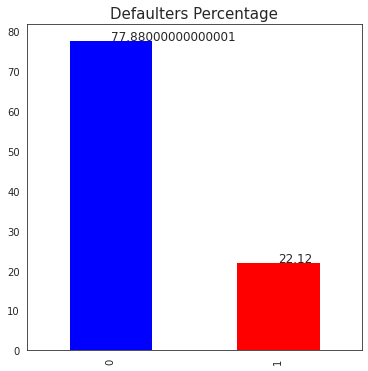

In [ ]:
# Chart - 1 visualization code
# Dependant Column Visualisation
# Dependant Variable Column Visualization
sns.set_style('white')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (14,5)

ax = df['Is_defaulters'].value_counts(normalize = True)*100
print(ax)
ax.plot.bar(figsize=(6,6), color = ('blue','red'))

plt.title("Defaulters Percentage", fontsize=15)
for x,y in zip([0,1],ax):
    plt.text(x,y,y,fontsize=12)
plt.show()

**1. Why did you pick the specific chart?**

A bar graph is used to compare data among categories.It also shows the counts of values for the different levels of a categorical or nominal variable.To analuse the number of customers who default in payment,I used bar graph.

**2. What is/are the insight(s) found from the chart?**

From the above chart I got to know that, the percent of customers who pay credit card bills duly are more than the number of credit card defaulter customers.The percent of default customers is 22.12% where as the percent  of customers who promplty pay the bills is 77.8%


**3.Will the gained insights help creating a positive business impact?**

**Are there any insights that lead to negative growth? Justify with specific reason.**

As a Bank manager , this data beomes very important.In order to keep a track on performance of the bank , and also to analyse the type of customers , this data becomes very important.It also plays a key role in tracking the customers who havent paid the bills.

**Chart - 2 - Pie plot on martial status of customers using credit card.(Univariate)**

<Axes: ylabel='MARRIAGE'>

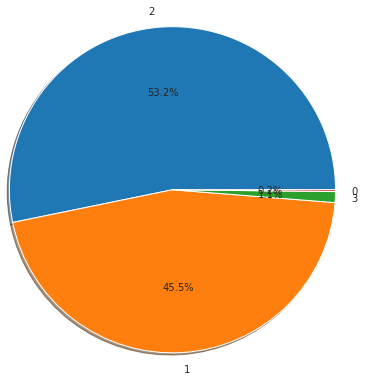

In [ ]:
# Chart - 2 visualization code
sns.set_style('white')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (14,5)
df["MARRIAGE"].value_counts().plot(kind="pie", autopct='%0.1f%%',radius=1.5, shadow=True)
     

**1. Why did you pick the specific chart?**

A pie chart expresses a part-to-whole relationship in our. data.Each slice represents one component and all slices added together equal the whole.It becomes easy to visualize data with pie charts and each slice can be analysed easily.To analyse the martial status of customers using credit card , I used pie chart.

**2. What is/are the insight(s) found from the chart?**

It is seen from the chart that ,the percent of married customers using credit card isfond to be 45.5% . The percent of unmarried customers using credit card is found to be 53.2%

**3. Will the gained insights help creating a positive business impact?** 

**Are there any insights that lead to negative growth? Justify with specific reason.**

As a bank official ,this information will be very usefull to bring new offers and policies to attract new customers.Also this information will be usefull to bring out offers on supplimentary cards for existing customers.

### Hypothesis testing

In [30]:
variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='left':
      return z
    elif tailed == 'right':
      return 1-z
    elif tailed == 'two_tailed':
      if z > 0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

### Hypothetical Statement - 1

In a random sample of 500 customers picked , the male percent of defaulters is found to be 60%.Find the test statistic for the claim that majority of defaulters are males.

### State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: Ho < = 50

Alternate Hypothesis : Ha > 50

Test Type: Right Tailed Test

In [31]:
sample_1=df[(df["Is_defaulters"]==1) & (df["SEX"] == 1)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 50
n=500
actual_value=60

In [32]:
# Getting Z value
z = (actual_value - hypothesis_number)/math.sqrt(hypothesis_number)*(1-hypothesis_number)/n
# Getting P - Value
p = p_value(z=z,tailed='right',t="false",hypothesis_number=hypothesis_number,df=sample_1,col="SEX")
# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.5551140844322191.


### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical test to obtain P-Value and found out the P-value to be 0.55 which is greater than the significance level of 0.05. Hence deriving the conclusion as "Failed To reject the Null Hypothesis.
That is we come to the conclusion that Male percent of defaulters is less than or equal to 50%

### Why did you choose the specific statistical test?

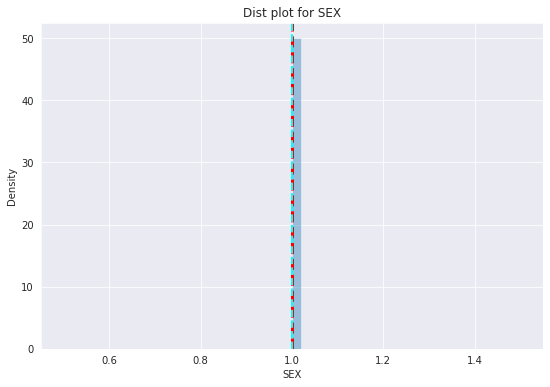

In [33]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= sample_1["SEX"]
sns.distplot(feature)
ax.axvline(feature.mean(),color='red', linestyle='dashed', linewidth=3)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title("Dist plot for SEX")
plt.show()

In [34]:
sample_1["SEX"].mean()

1.0

In [35]:
sample_1["SEX"].median()

1.0

The differnce between the mean and meadian is  less.Hence it is almost a Normal distribution.Also the sample size is also comparitively more.Hence I Have used Z-Test to obtain the statistics

### Hypothetical Statement - 2

The average limit balance of  credit card of  female  non-defaulters is 20,000

### State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : Ho = 20,000

Alternate Hypothesis : Ha != 20,000

Test Type : Two Tailed Test

In [36]:
sample_2=df[(df["SEX"]==2) & (df["Is_defaulters"]==0)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 20000

In [44]:
sample_2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is_defaulters
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
11,11,200000,2,3,2,34,0,0,2,0,...,2513,1828,3731,2306,12,50,300,3738,66,0


In [38]:
sample_mean = sample_2.mean()
n = len(sample_2)

In [39]:
sample_2["LIMIT_BAL"]=pd.to_numeric(sample_2["LIMIT_BAL"])
#type(df["LIMIT_BAL"])

In [40]:
z,p_value=stats.ttest_1samp(sample_2["LIMIT_BAL"],hypothesis_number)

In [41]:
print(z)
print(p_value)

151.34836219365224
0.0


In [42]:
print(conclusion(p_value))

Null Hypothesis rejected Successfully for p = 0.0


### Which statistical test have you done to obtain P-Value?

I have used T-Test as the statistical test to obtain P-Value and found out that the P-value is less than the significance level.Hence rejecting the Null hypothesis sucessfully.

### Why did you choose the specific statistical test?

In [43]:
sample_2["LIMIT_BAL"].mean()-sample_2["LIMIT_BAL"].median()

19726.531465607346

From the above code we can see that there is a huge difference between mean and median.Hence the data is skewed and not Normally distributed.We cannot perform z-test for skewed data.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests can and should be used even for heavily skewed data.

So, for a skewed data we can use T-test for better result. Thus, I used t - test.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Bar plot on dependent variable  i.e., Is_defaulters (Univariate)

0    77.88
1    22.12
Name: Is_defaulters, dtype: float64


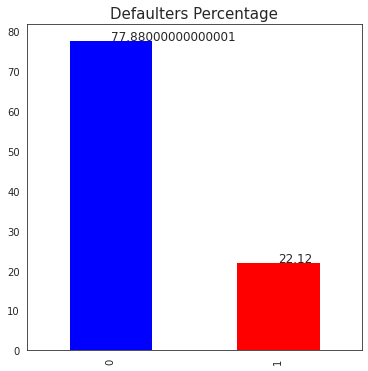

In [ ]:
# Chart - 1 visualization code
# Dependant Column Visualisation
# Dependant Variable Column Visualization
sns.set_style('white')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (14,5)

ax = df['Is_defaulters'].value_counts(normalize = True)*100
print(ax)
ax.plot.bar(figsize=(6,6), color = ('blue','red'))

plt.title("Defaulters Percentage", fontsize=15)
for x,y in zip([0,1],ax):
    plt.text(x,y,y,fontsize=12)
plt.show()

**1. Why did you pick the specific chart?**

A bar graph is used to compare data among categories.It also shows the counts of values for the different levels of a categorical or nominal variable.To analuse the number of customers who default in payment,I used bar graph.

**2. What is/are the insight(s) found from the chart?**

From the above chart I got to know that, the percent of customers who pay credit card bills duly are more than the number of credit card defaulter customers.The percent of default customers is 22.12% where as the percent  of customers who promplty pay the bills is 77.8%


**3. Will the gained insights help creating a positive business impact?**

**Are there any insights that lead to negative growth? Justify with specific reason.**

As a Bank manager , this data beomes very important.In order to keep a track on performance of the bank , and also to analyse the type of customers , this data becomes very important.It also plays a key role in tracking the customers who havent paid the bills.

## **Chart - 2 - Pie plot on martial status of customers using credit card.(Univariate)**

<Axes: ylabel='MARRIAGE'>

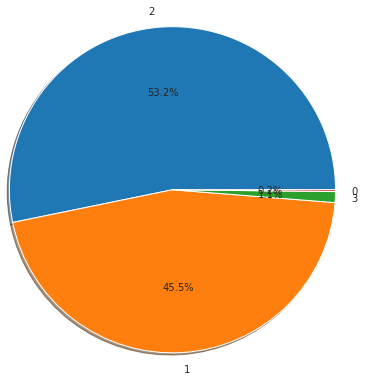

In [ ]:
# Chart - 2 visualization code
sns.set_style('white')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (14,5)
df["MARRIAGE"].value_counts().plot(kind="pie", autopct='%0.1f%%',radius=1.5, shadow=True)
     

**1. Why did you pick the specific chart?**

A pie chart expresses a part-to-whole relationship in our. data.Each slice represents one component and all slices added together equal the whole.It becomes easy to visualize data with pie charts and each slice can be analysed easily.To analyse the martial status of customers using credit card , I used pie chart.

**2. What is/are the insight(s) found from the chart?**

It is seen from the chart that ,the percent of married customers using credit card isfond to be 45.5% . The percent of unmarried customers using credit card is found to be 53.2%

**3. Will the gained insights help creating a positive business impact?** 

**Are there any insights that lead to negative growth? Justify with specific reason.**

As a bank official ,this information will be very usefull to bring new offers and policies to attract new customers.Also this information will be usefull to bring out offers on supplimentary cards for existing customers.

### **Chart - 3 - Male and Female credit card defaulters**

In [ ]:
# Chart - 3 visualization code
df1=duly_paid.groupby("SEX")["ID"].count().reset_index().rename(columns={"ID" : "Number of customers"})
df1



,SEX,Number of customers
0,1,1492
1,2,2196


<Axes: xlabel='SEX', ylabel='Number of customers'>

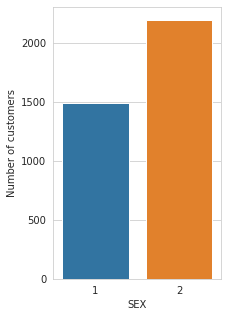

In [ ]:
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (3,5)
sns.barplot(data=df1, x="SEX", y="Number of customers")

**1. Why did you pick the specific chart?**

A bar graph is used to compare data among categories.It also shows the counts of values for the different levels of a categorical or nominal variable.To visualise   the number of males and females who could pay all the credit bills duly,without any delay,I have used bar graph.

**2. What is/are the insight(s) found from the chart?**

From the plot , it can be seen that the number of male customers who pay credit card bills duly 1492, is and the number of female customers who could pay credit card bills duly is:2196

**3. Will the gained insights help creating a positive business impact?** 

**Are there any insights that lead to negative growth? Justify with specific reason.**

The plot will definetly be usefull to the analysis of the customers who duly piad the bills of all the months.It can be helpfull in providing extra benifts to those type of customers.

### **Chart - 4 - Credit Card defaulter order by Education**

In [ ]:
education_order=(df['EDUCATION'] == 0) |(df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 4)

In [ ]:
df.loc[education_order, 'EDUCATION' ] = 3

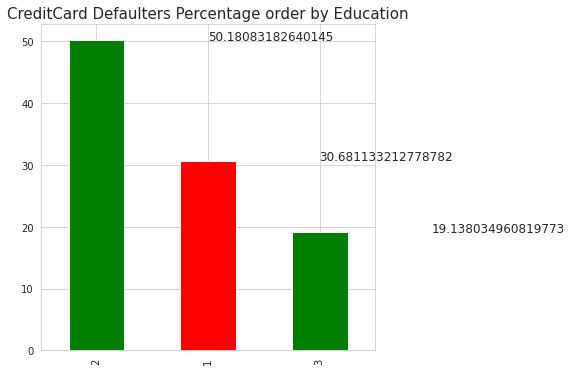

In [ ]:
ax = df[df['Is_defaulters'] == 1]['EDUCATION'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(6,6), color = ('green', 'red'))

plt.title("CreditCard Defaulters Percentage order by Education", fontsize=15)
for x,y in zip([1,2,3],ax):
    plt.text(x,y,y,fontsize=12)
plt.show()

A bar graph is used to compare data among categories.It also shows the counts of values for the different levels of a categorical or nominal variable.To visualise   the credit card defualter order by education , I used bar graph.

From the graph , it is seen that customer graduated from university , tend to default more followed by customer graduated followed by customer graduated from school followed by high school.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this information will definetly be usefull.From this analysis , the bank officials can decide as to whom to give credit card to. When  given the credit card what could be the limit balance the rate of intrest for each sector of education.

#### Chart - 5 - Visual Analysis on age of customers.





<Axes: xlabel='AGE', ylabel='Count'>

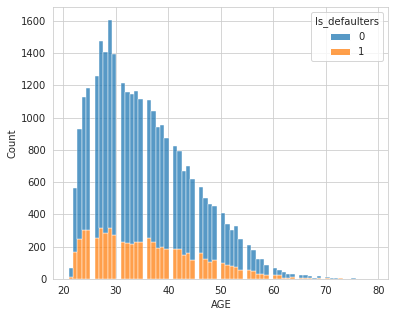

In [ ]:
# Chart - 5 visualization code
# Visualizing the age of customers.
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (6,5)

sns.histplot(data=df, x="AGE", hue="Is_defaulters" , multiple="stack")


##### 1. Why did you pick the specific chart?

A histogram is a tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.
To visualise the age of customers and defaulty customers, I have used Histogram